<a href="https://colab.research.google.com/github/FernandoGuirraS/sigmoidal_data_science/blob/main/Violencia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/94764799/142976748-5a82e169-06d9-492e-81f6-ba28dd06c394.png" height=65px> 

#### **Fernando Guirra**

*by [Guirra Datatec](https://medium.com/@guirradatatec)*

---

# Analisando dados da Violência no Rio de Janeiro

<div align='center'>
    <img src="https://user-images.githubusercontent.com/94764799/144366249-f5afaddb-a365-4c96-b704-0305f0322b5e.png" height=400px> 
</div>

Conhecido com "Cidade Maravilhosa", famosa canção escrita por Andre Filho que estava certo das suas palavras. O Rio de Janeiro é lindo, cheio de pontos turísticos, famosos por suas belas prais e também conhecida pelas grandes favelas.

Mas nem só de bonito vive o estado do Rio de Janeiro. Em diversos momentos nos deparamos com as tristes notícias:

* [Violência no Rio de Janeiro - Desafio do Estado é vencer o tráfico](https://vestibular.uol.com.br/resumo-das-disciplinas/atualidades/violencia-no-rio-de-janeiro-desafio-do-estado-e-vencer-o-trafico.htm)
* [Em 5 anos, 103 crianças foram baleadas e 30 morreram vítimas da violência no Rio](https://www.cnnbrasil.com.br/nacional/em-5-anos-103-criancas-foram-baleadas-e-30-morreram-vitimas-da-violencia-no-rio/)
* [RJ tem 7 entre as 10 maiores cidades com as mais altas taxas de letalidade policial do país](https://g1.globo.com/rj/rio-de-janeiro/noticia/2021/07/15/rj-tem-7-entre-as-10-maiores-cidades-com-as-mais-altas-taxas-de-letalidade-policial-do-pais.ghtml)
* [Mandam ficar em casa e levo tiro quando varro a laje, diz morador no RJ](https://noticias.uol.com.br/cotidiano/ultimas-noticias/2020/05/21/mandam-ficar-em-casa-e-levo-tiro-quando-varro-a-laje-diz-morador-no-rj.htm)

O cotidiano de moradores e turistas é assustador devido a frequente guerra entre as facções no estado. 

Segundo dados do portal *G1*, o Rio de Janeiro é um dos cinco estados mais violentos do Brasil, no ano de 2021, registrando 1800 homicídios. Há uma grande disputa, no estado, entre as facções provocando momentos de terror. Isso não traz apenas ao aumento dos casos de homicídios, mas em assalto, roubos, entre outros, fazendo com que o estado seja conhecido por sua criminalidade.

Devido a isso, são criadas medidas públicas para conter a violência no estado. Dentre eles, o Instituto de Segurança Pública (ISP), criado em 1999 com a missão de produzir informações, disseminar pesquisas e análises com vistas a influenciar e subsidiar a implementação de políticas públicas de segurança e assegurar a participação social na construção dessas políticas. O ISP é responsável pelo canal de participação social e de comunicação entre a comunidade na busca comum pela redução da violência.

Uma das medidas do Instituto é a Transparência dos dados, divulgando bases e visualizações das pesquisas da violência no estado no Rio de Janeiro. Uma iniciativa é o [Portal ISPDados](http://www.ispdados.rj.gov.br/), onde é possível verificar diferentes bases de dados do estado.

O objetivo desse notebook é o estudo de uma base de dados, disponível do portal ISPDados, no intuito de retirar as informções, através de  análises estatística, da violência no Rio de Janeiro.




## Obtenção dos dados

Os dados foram retirados do portal [ISPDados](http://www.ispdados.rj.gov.br/), página de Dados Abertos do Instituto de Segurança Pública. No portal é possível encontrar bases de dados de registros criminais e de atividade policial do estado do Rio de Janeiro. As estatísticas divulgadas construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM).

### Importando os dados

O arquivo para realização das análises de violência do estado do Rio de Janeiro se encontra no neste [endereço](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv), onde foi realizado um pré-processamento dos dados, feitos pelo professor Carlos Melo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise Inicial dos Dados

Inicialmente, vamos verificar a disposição dos dados, visualizando as 5 primeiras linhas do dataframe.



In [3]:
# exibindo as 5 primeiras linhas do dataframe
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### Qual a quantidade de entradas e variáveis do dataset?

O dataframe é bem resumido devido ao número de entradas, mas apresenta um grande de número de variáveis. No total temos $344$ entradas e $56$ variáveis.

In [4]:
print('Entradas: {}'.format(df.shape[0]))
print('Variáveis: {}'.format(df.shape[1]))

Entradas: 344
Variáveis: 56


### Quais as variáveis do problema?

O *dataset* possui $56$ variáveis, abordando os diferentes tipos de violência a partir das ocorrências. Abaixo, é informado o significado que cada uma faz.

#### **Dicionário de Variáveis:**

* `vano` - Ano da ocorrência
* `mes` - Mês da ocorrência
* `hom_doloso` - Ocorrência com homicídio doloso
* `lesao_corp_morte` - Ocorrência lesão corporal seguida de morte
* `latrocinio` - Ocorrência de latrocínio
* `hom_por_interv_policial` - Ocorrência com homicídio por intervenção policial
* `tentat_hom` - Ocorrência de tentativa de homicídio
* `lesao_corp_dolosa` - Ocorrência com lesão corporal dolosa
* `estupro` - Ocorrência de estupro
* `hom_culposo` - Ocorrência de homicídio culposo
* `lesao_corp_culposa` - Ocorrência de lesão corporal culposa
* `roubo_comercio` - Ocorrência de roubo a comércio
* `roubo_residencia` - Ocorrência de roubo a residência
* `roubo_veiculo` - Ocorrência de roubo de veículo
* `roubo_carga` - Ocorrência de roubo de carga
* `roubo_transeunte` - Ocorrência de roubo a indivíduos transitam em vias públicas 
* `roubo_em_coletivo` - Ocorrência de roubo em coletivo
* `roubo_banco` - Ocorrência de roubo a bancos
* `roubo_cx_eletronico` - Ocorrência de roubo a caixa eletrônico
* `roubo_celular` - Ocorrência de roubo de aparelho celular
* `roubo_conducao_saque` - Ocorrência de roubo com condução de vítima a saque em instituição financeira
* `roubo_apos_saque` - Ocorrência de roubo após saque em instituição financeira
* `roubo_bicicleta` - Ocorrência de roubo de bicicleta
* `outros_roubos` - Outros tipos de roubos
* `total_roubos` - Total de roubos
* `furto_veiculos` - Ocorrência de furto de veículos
* `furto_transeunte` - Ocorrência de furto em via pública
* `furto_coletivo` - Ocorrência de furto em coletivo
* `furto_celular` - Ocorrência de furto de aparelho celular
* `furto_bicicleta` - Ocorrência de furto de bicicleta
* `outros_furtos` - Outros furtos
* `total_furtos` - Total de furtos
* `sequestro` - Ocorrência de sequestro
* `extorsao` - Ocorrência de extorsão
* `sequestro_relampago` - Ocorrência de sequestro relâmpago
* `estelionato` - Ocorrência de estelionato
* `apreensao_drogas` - Apreensão de drogas
* `posse_drogas` - Posse de drogas
* `trafico_drogas` - Tráfico de drogas
* `apreensao_drogas_sem_autor` - Apreensão de drogas sem autor
* `recuperacao_veiculos` - Recuperação de veíclos
* `apf` - Auto de Prisão em Flagrante
* `aaapai` - Apreensão de Adolescente por Prática de Ato Infracional
* `cmp` - 
* `cmba` - Coletivo de Mulheres do Brasil
* `ameaca` - Ameaça
* `pessoas_desaparecidas` - Pessoas desaparecidas
* `encontro_cadaver` - Cadáver encontrado
* `encontro_ossada` - Encontro de ossada
* `pol_militares_mortos_serv` - Policiais militares mortos em serviço
* `pol_civis_mortos_serv` - Policiais civis mortos em serviço
* `indicador_letalidade` - Letalidade
* `indicador_roubo_rua` - Roubo Rua
* `indicador_roubo_veic` - Roubo de veículos
* `registro_ocorrencias` - Registro de ocorrências
* `fase` - Fase da ocorrência

In [5]:
# colunas do dataframe
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

### Qual o tipo das variáveis

As variáveis se diferenciam entre inteiras e flutuantes. Quando analisamos as colunas em que as variáveis são do tipo *float64*, podemos notar que são números inteiros mas com **.0** ao final da representação. Como são casos de ocorrências, a predominância dos números são inteiros, para determinar a quantidade de ocorrências.

In [6]:
# tipo das variaveis do dataframe
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

### Qual a quantidade de valores ausentes das variáveis?

Os valores ausentes são representados por valores *NaN,* indicando a falta de dados na variável. A quantidade de valores ausentes representa a qualidade do *dataset*. A quantidade de variáveis que apresentam valores faltantes é enorme, totalizando. Podemos observar que a coluna `roubo_bicicleta` e `furto_bicicleta` apresentam pouco mais de $80\%$ dos seus valores faltantes. As colunas `posse_drogas`, `trafico_drogas`, `apreensao_drogas_sem_autor`, `apf`, `aaapai`, `cmp`, `cmba`, apresentam quase $53\%$ dos valores ausentes. Já as colunas `lesao_corp_morte`,`hom_por_interv_policial`, `estupro`, `hom_culposo`, `lesao_corp_culposa`, `roubo_cx_eletronico`, `roubo_celular`, `roubo_conducao_saque`, `roubo_apos_saque`, `furto_coletivo`, `furto_celular`, `sequestro`,`extorsao`, `sequestro_relampago`, `estelionato`, `ameaca`, `pessoas_desaparecidas`, `encontro_ossada`, `pol_militares_mortos_serv`, `pol_civis_mortos_serv`, `registro_ocorrencias` apresentam entre $24\%$ a $42\%$ dos dados ausentes. Um total de $30$ variáveis ausentes, resultando em mais da metade das variáveis do dataset.

In [7]:
# valores ausentes das variáveis
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

---

## Informações Estatística da Violência no Rio de Janeiro

### Qual a média de roubo de veículos?

A média de roubo de veículos no estado está acim de $2400,$ um valor alto devido a quantidade de entradas do dataframe. A quantidade de veículos roubados no estado, de acordo com as ocorrências aqui salvas, é de $842352,$ que é um número alarmante para cidadãos e turistas da região, tendo a insegurança de pdoer transitar com seu veículo.

In [13]:
# media da variável roubo_veiculo
df.roubo_veiculo.mean()

2448.6976744186045

### Qual a média de furto de veículos?

Uma dúvida que nos vem a mente é se roubo e furto são a mesma coisa. E a resposta é não! O furto não envolve violência contra a vítima, enquanto o roubo pressupõe que a pessoa foi ameaçada ou agredida de alguma forma para entregar o objeto roubado. A média de furtos de veículos esta mais baixa que a quantidade de roubo de veículos da região, onde a média é pouco acima de $1670,$ representando um alto valor.

In [16]:
# media da variavel furto veiculo
df.furto_veiculos.mean()

1674.671511627907

### Qual a média de veículos recuperados?

Uma das dificuldades das forças policiais é a recuperação de pertences de vítimas, após a ocorrência. Como existe o alto índice de veículos furtados e roubados, vemos que o trabalho para a recuperação é trabalhoso mas que tem algum sucesso. A média de veículos que são retirados da vítima e recuperados é de $1772,$ número acima da média de veículos roubados, mas acima da média de veículos furtados.

In [17]:
# media da variavel recuperacao_veiculos
df.recuperacao_veiculos.mean()

1772.2383720930231

### Qual a porcentagem de veículos são recuperados?

Do total de veículos roubados, a média de veículos recuperados é de $1772, $ um número alto. Comparando a quantidade de veículos roubados e furtados com a quantidade de veículos que são recuperados, observamos que a porcentagem de vítimas que tem seu veículo recuperado é de $43\%,$ um número muito significativo, mas ainda representa um grande valor de ocorrências que não obtiveram sucesso.

In [24]:
# porcentagem de veiculos recuperados
pvr = df.recuperacao_veiculos.sum() / (df.roubo_veiculo.sum() + df.furto_veiculos.sum())
print("Porcentagem de veiculos recuperados: {}".format(round(pvr * 100, 2))," %")

Porcentagem de veiculos recuperados: 42.98  %


### Resumo estatístico do dataframe

A função *describe* retorna as principais estatísticas das variáveis do dataframe. A coluna `vano` se inicia em $1991$ e termina em $2019.$ Como o número de entradas no dataframe é de $344,$ observamos que as ocorrências são inseridas no banco de dados mensalmente. Como os noticiário tem crescido sobre a violência policial com a população, vamos focar, inicialmente, na variável `hom_por_interv_policial` que tem em média $72$ homicídios realizado por cívis no Rio de Janeiro. O número máximo registrado foi de $194,$ em no mês de julho de $2019,$ evidênciando os crescentes casos desse tipo de ocorrência. Como o Rio de Janeiro é uma cidade turística, a quantidade de visitantes nas ruas do estado é muito grande. Mas ninguém sabe o perigo que é andar desprotegido. O **roubo transeunte** é o assalto a indivíduos que são abordados enquanto transitam em vias públicas e o número é muito alto. Em média, $3418$ são roubados por mês no estado, chegando a registrar um pico de $9669$ ocorrências desse tipo. A quantidade de roubos, dados pela variável `total_roubos` tem em média $9428$ ocorrências.

Os números são 

In [25]:
# describe do dataframe
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

In [34]:
# mes e ano em que hom_por_interv_policial tem valor 194
df[df['hom_por_interv_policial'] == 194]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2


### Quais as estatísticas de homicídio doloso no estado?

O **homicídio doloso** é o ato criminoso em que alguém tem a intenção de matar outro indivíduo. A média de ocorrências desse crime é de, aproximadamente, $505$ casos, onde o número mínimo já registrado é de $272$ casos e o máximo de $831$. 

In [36]:
# numero max e min da variável hom_doloso
print("Número mínimo de ocorrências de homicídio doloso: \t{}\n".format(df.hom_doloso.min()))
print("Número máximo de ocorrências de homicídio doloso: \t{}".format(df.hom_doloso.max()))

Número mínimo de ocorrências de homicídio doloso: 	272

Número máximo de ocorrências de homicídio doloso: 	831


---

## Visualização de Dados

A visualização de dados é uma das etapas mais importantes do estudo onde o intuito é comunicá-los de forma clara e eficaz aos leitores.

Aqui serão apresentados gráficos de algumas variáveis para melhor entendimento do comportamento dos dados.

Primeiramente, vamos importar a biblioteca *matplotlib* para realizar a visualização dos dados.

In [47]:
import matplotlib.pyplot as plt

### Casos de homicídio doloso no decorrer dos anos

Primeiro vamos observar o comportamento da variável `hom_doloso` no decorrer dos anos, desde $1991$ até $2019.$ Quando analisamos o gráfico, podemos observar que os anos que apresentaram mais ocorrências desse tipo foram em $1994$ e $1995$. Desde então os números vem apresentando uma queda em relação aos anos iniciais. Isso pode se da pelo fato das políticas, sociais e policiais, adotadas no decorrer dos anos, que vem obtendo sucesso, fazendo com que os números de casos apresente uma queda considerável.

In [46]:
# criacao de um dicionario para homicidio doloso por ano
hom_doloso_anual = {}

# salvando a quantidade de homicidio doloso anual
for i in range(1991, 2020):
    hom_doloso_anual[i] = df[df['vano'] == i]['hom_doloso'].sum()

<BarContainer object of 29 artists>

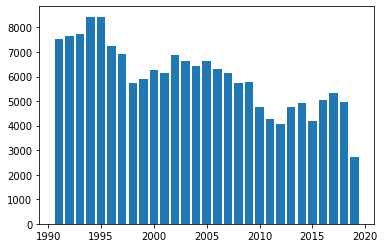

In [52]:
# construindo um gráfico de barras a partir do dicionario hom_doloso_anual
plt.bar(hom_doloso_anual.keys(), hom_doloso_anual.values(), )

### Histograma da Variável `hom_doloso`

O número de casos de homicídio doloso se concentra entre $450$ e $600,$ hoje ja foram registrados alguns meses em que a cota máxima ultrapassava $800$ ocorrências.

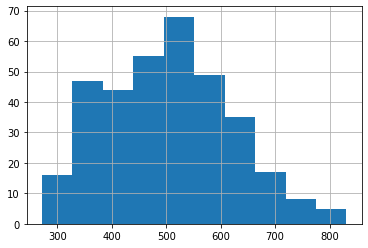

In [56]:
# Histograma da variavel hom_doloso
df.hom_doloso.hist()

### Comportamento das variáveis `roubo_em_coletivo`, `roubo_transeuente`

Essas variáveis representam a maioria da população do estado. Pessoas que dependem do transporte público e transitam por vias públicas. Podemos observar que o roubo em coletivo acontece mas quando comparado com o roubo transeuente, acaba sendo mínimo. Houve um aumento no número de ocorrências de roubo transuente, chegando a picos próximos a $10000$ ocorrência. Já o roubo em coletivo se manteve estável durante os anos, oscilando muito pouco em comparação ao grande crescimento do número de roubos de pessoas que transitam pelas ruas, gerando um alerta a população.

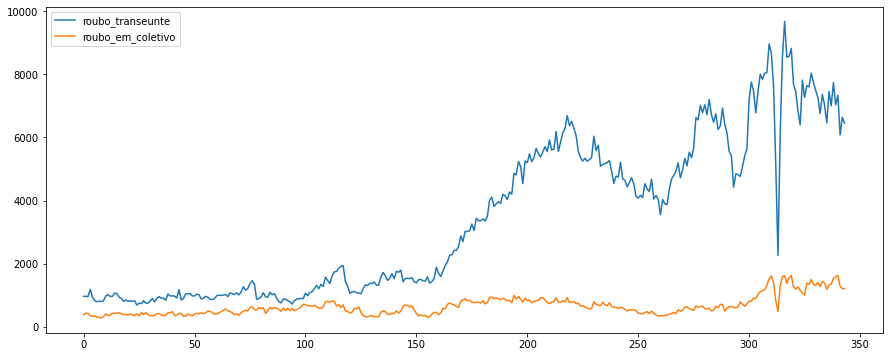

In [77]:
# plotando os roubos em coletivo e transeunte
fig, ax = plt.subplots(figsize=(15,6))
df.roubo_transeunte.plot();
df.roubo_em_coletivo.plot();
ax.legend();

### Gráfico de carros roubados, furtados e recuperados

A quantidade de furtos de veículos, em $1991$ era maior que as demais e se estabeleceu por alguns anos entre o topo de ocorrências de roubo e recuperação de veículos. A variável roubo, era menor que ocorrências de furtos, em $1991.$ Mas os números de casos foram aumentando até que se estabeleceu sempre acima das demais variáveis, com um grande crescimento logo nos anos finais disponíveis no *dataset.* Já a recuperação de veículos começou muito aquém as outras duas variáveis. A partir do momento que a quantidade de roubos começou a crescer em relação as outras, o número de veículos recuperados começaram a aumentar, se mantendo muito próximo a quantidade de veículos roubados. 

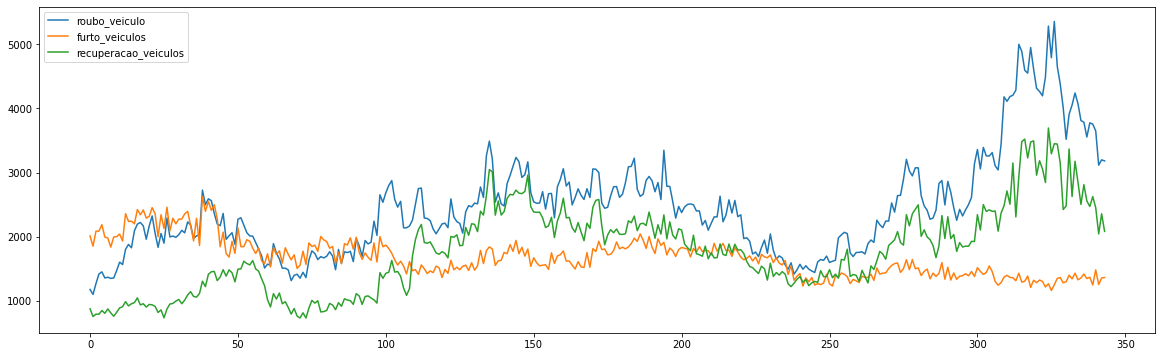

In [76]:
# plotando as variaveis roubo, furto e recuperacao de veiculos
fig, ax = plt.subplots(figsize=(20,6))
df.roubo_veiculo.plot();
df.furto_veiculos.plot();
df.recuperacao_veiculos.plot();
ax.legend();

### Registros de Ocorrência

Os registros de ocorrências tem aumentando no deccorer dos anos, saindo de um patamar de pouco mais de $30$ mil ocorrências para valores próximos a $70$ mil. 

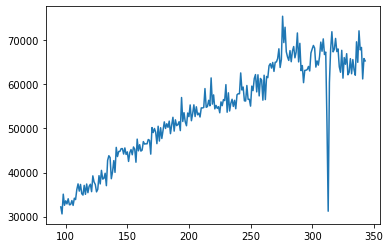

In [78]:
# plotando o registro de ocorrencias
df['registro_ocorrencias'].plot();

## Conclusão

Nesse notebook foi apresentado um breve estudo sobre os dados disponíveis pelo Instituto de Segurança Pública do Rio de Janeiro, onde foi constatado números crescentes nos números de ocorrências dos diferentes casos registrados.

Podemos observar um grande número no número de homicídios e roubos, o que coloca o Rio de Janeiro em um dos estados mais violentos do Brasil. Os números são alarmantes mas o passar dos anos, atráves de pesquisas, é possível elaborar métodos capazes de reduzir esses números, de maneira que a segurança seja estabelecida no Estado.

Para mais estudos relacionados a análise de dados, não deixe de visitar minhas páginas para conferir os diferentes estudos nessa área:

* [LinkedIn](https://www.linkedin.com/in/fernandoguirra)
* [Medium](https://medium.com/@guirradatatec)
* [GitHub](https://github.com/FernandoGuirraS)

Obrigado, valeu!

Abraço do Guirra!